<a href="https://colab.research.google.com/github/fatumaahmed2024/AI-Coursework-2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [ ]:
from google.colab import files
upload = files.upload()
df = pd.read_csv('Mall_Customers.csv')
fn = 'Mall_Customers.csv'
df.head()

Saving Mall_Customers.csv to Mall_Customers (2).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:

#Cleaning the data
df.shape
df.dtypes
df.isnull().sum()
df = df.drop_duplicates().reset_index(drop=True)

                        count unique     top freq   mean        std   min  \
CustomerID              200.0    NaN     NaN  NaN  100.5  57.879185   1.0   
Gender                    200      2  Female  112    NaN        NaN   NaN   
Age                     200.0    NaN     NaN  NaN  38.85  13.969007  18.0   
Annual Income (k$)      200.0    NaN     NaN  NaN  60.56  26.264721  15.0   
Spending Score (1-100)  200.0    NaN     NaN  NaN   50.2  25.823522   1.0   

                          25%    50%     75%    max  
CustomerID              50.75  100.5  150.25  200.0  
Gender                    NaN    NaN     NaN    NaN  
Age                     28.75   36.0    49.0   70.0  
Annual Income (k$)       41.5   61.5    78.0  137.0  
Spending Score (1-100)  34.75   50.0    73.0   99.0  


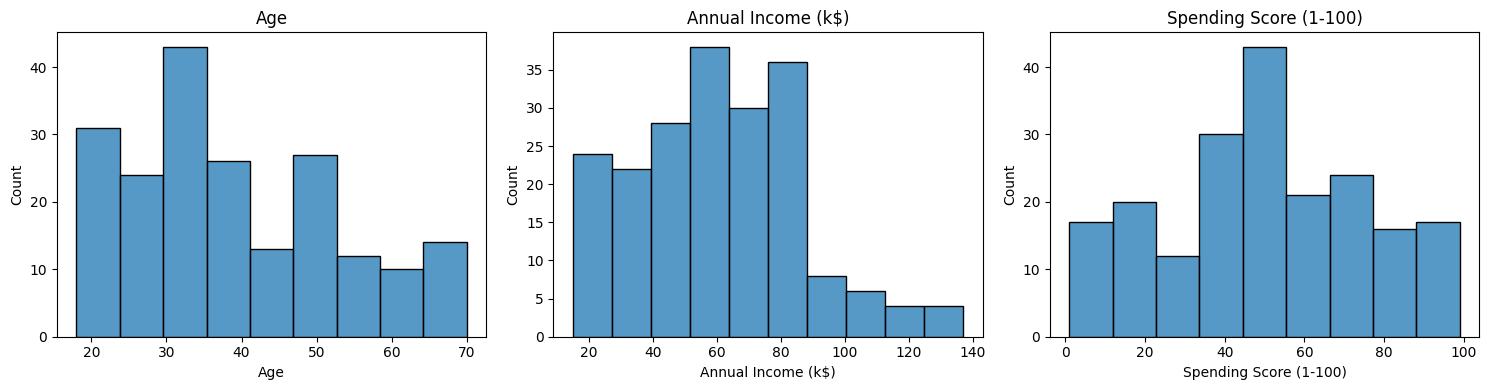

In [ ]:
#Exploratory Data Analysis
print(df.describe(include='all').transpose())

#Histogram for age, annual income, spending score(1-100)
fig, axs = plt.subplots(1,3, figsize=(15,4))
sns.histplot(df['Age'],kde=False, ax=axs[0]).set_title('Age')
sns.histplot(df['Annual Income (k$)'],kde=False, ax=axs[1]).set_title('Annual Income (k$)')
sns.histplot(df['Spending Score (1-100)'], kde=False,ax=axs[2]).set_title('Spending Score (1-100)')
plt.tight_layout()
plt.show()

In [ ]:
#3 Insights/Obsevations
ins1 = f"Mean annual income (k$) is {df['Annual Income (k$)'].mean():.2f}."
ins2 = f"Median spending score is {df['Spending Score (1-100)'].median():.0f}."
gender_group = df.groupby('Gender')['Spending Score (1-100)'].mean().sort_values(ascending=False)
ins3 = f"Gender with higher avg spending score is {gender_group.index[0]} ({gender_group.iloc[0]:.2f})"
print(ins1)
print(ins2)
print(ins3)


Mean annual income (k$) is 60.56.
Median spending score is 50.
Gender with higher avg spending score is Female (51.53)


In [ ]:
#scaler helper
scaler = StandardScaler()
def scale_series(s):
  return scaler.fit_transform(s.values.reshape(-1,1)).reshape(-1)

In [ ]:
x1 = df[['Annual Income (k$)']].values
x1_scaled = scaler.fit_transform(x1)



Silhouette scores: {2: np.float64(0.562), 3: np.float64(0.563), 4: np.float64(0.558), 5: np.float64(0.584), 6: np.float64(0.606), 7: np.float64(0.614), 8: np.float64(0.609), 9: np.float64(0.603), 10: np.float64(0.599)}


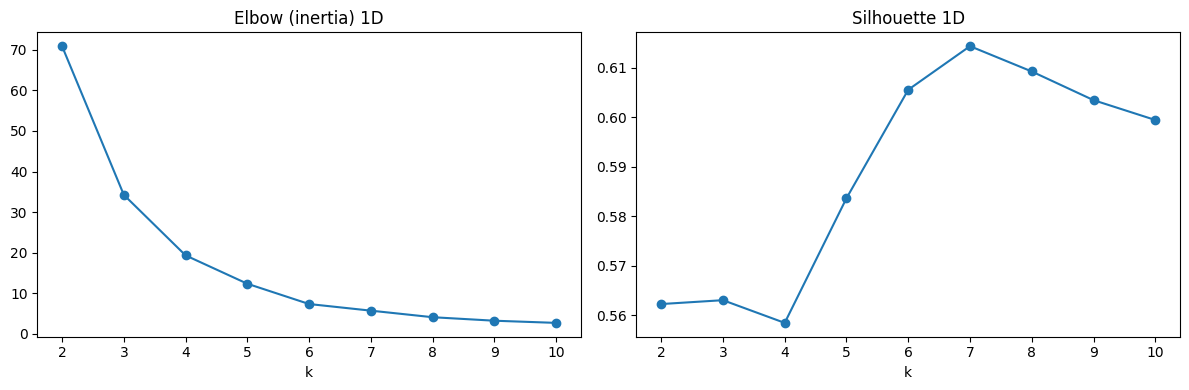

In [ ]:
# elbow
inertias = []
sil_scores = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(x1_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(x1_scaled, labels))

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(K, inertias, '-o'); ax[0].set_title('Elbow (inertia) 1D'); ax[0].set_xlabel('k')
ax[1].plot(K, sil_scores, '-o'); ax[1].set_title('Silhouette 1D'); ax[1].set_xlabel('k')
plt.tight_layout()
print('Silhouette scores:', dict(zip(K, [round(s,3) for s in sil_scores])))

Text(0.5, 1.0, '1D Clusters (Annual Income) k=7')

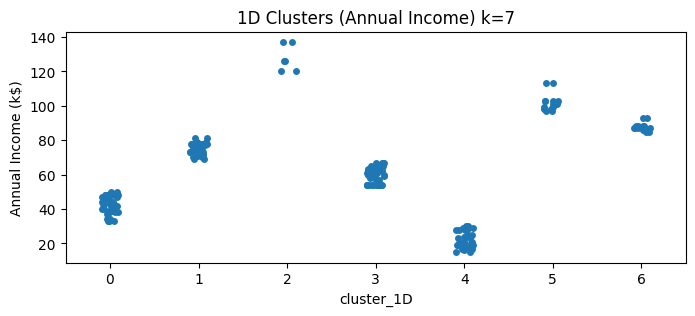

In [ ]:
#Pick K by highest silhouette

k_sel = int(max(zip(K, sil_scores), key=lambda t: t[1])[0])  # auto pick highest silhouette
km1 = KMeans(n_clusters=k_sel, random_state=42, n_init=10).fit(x1_scaled)
df['cluster_1D'] = km1.labels_
# plot
plt.figure(figsize=(8,3))
sns.stripplot(x='cluster_1D', y='Annual Income (k$)', data=df, jitter=True)
plt.title(f'1D Clusters (Annual Income) k={k_sel}')

In [ ]:
# 3b - 2 features
x2 = df[['Annual Income (k$)','Spending Score (1-100)']].values
x2_scaled = scaler.fit_transform(x2)

Silhouette scores 2D: {2: np.float64(0.321), 3: np.float64(0.467), 4: np.float64(0.494), 5: np.float64(0.555), 6: np.float64(0.54), 7: np.float64(0.528), 8: np.float64(0.455), 9: np.float64(0.457), 10: np.float64(0.443)}


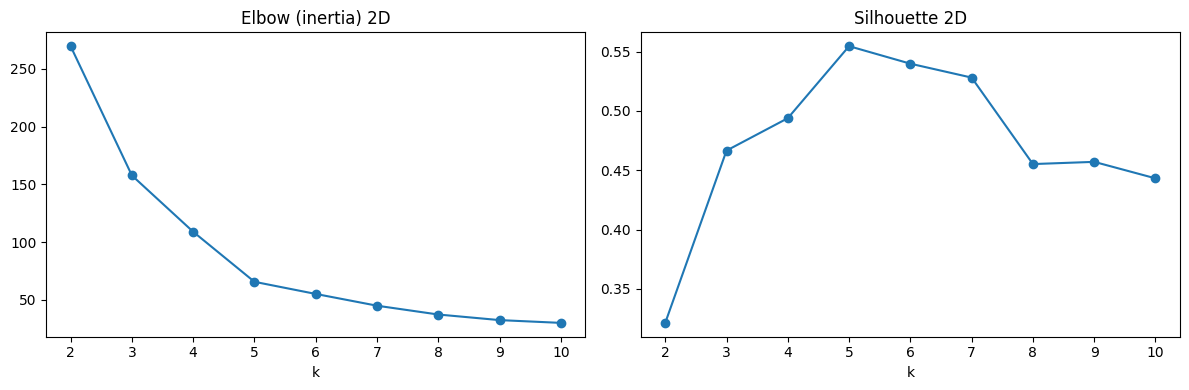

In [ ]:
#elbow for 2 features
inertias2 = []
sil_scores2 = []
K2 = range(2,11)
for k in K2:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(x2_scaled)
    inertias2.append(km.inertia_)
    sil_scores2.append(silhouette_score(x2_scaled, labels))

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(K2, inertias2, '-o'); ax[0].set_title('Elbow (inertia) 2D'); ax[0].set_xlabel('k')
ax[1].plot(K2, sil_scores2, '-o'); ax[1].set_title('Silhouette 2D'); ax[1].set_xlabel('k')
plt.tight_layout()
print('Silhouette scores 2D:', dict(zip(K2, [round(s,3) for s in sil_scores2])))

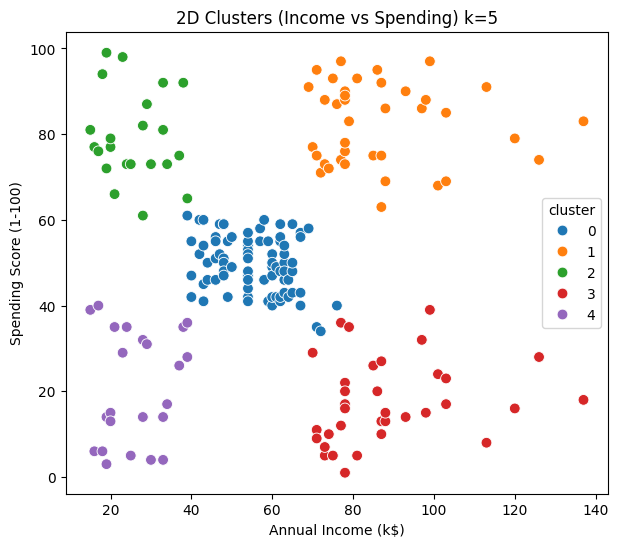

In [ ]:
#optimal no. of clusters

k2_sel = int(max(zip(K2, sil_scores2), key=lambda t: t[1])[0])
km2 = KMeans(n_clusters=k2_sel, random_state=42, n_init=10).fit(x2_scaled)
df['cluster_2D'] = km2.labels_

plt.figure(figsize=(7,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_2D', palette='tab10', data=df, s=60)
plt.title(f'2D Clusters (Income vs Spending) k={k2_sel}')
plt.legend(title='cluster')
plt.show()

In [ ]:
# Qn4

centroids_scaled = km2.cluster_centers_
# convert centroids back to original scale
# we used scaler.fit_transform(X2) so we can invert transform
centroids_orig = scaler.inverse_transform(centroids_scaled)
cent_df = pd.DataFrame(centroids_orig, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
cent_df['cluster'] = range(len(cent_df))
counts = df['cluster_2D'].value_counts().sort_index()
summary = cent_df.set_index('cluster').join(counts.rename('count'))
print(summary)
# show mean stats per cluster
print(df.groupby('cluster_2D')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(2))

         Annual Income (k$)  Spending Score (1-100)  count
cluster                                                   
0                 55.296296               49.518519     81
1                 86.538462               82.128205     39
2                 25.727273               79.363636     22
3                 88.200000               17.114286     35
4                 26.304348               20.913043     23
              Age  Annual Income (k$)  Spending Score (1-100)
cluster_2D                                                   
0           42.72               55.30                   49.52
1           32.69               86.54                   82.13
2           25.27               25.73                   79.36
3           41.11               88.20                   17.11
4           45.22               26.30                   20.91


Q5. Customer Engagement Recommendations

Cluster 0
Use exclusive rewards programs

Cluster 1
Give discounts and do awareness campaigns

Cluster 2
Give offers that motivate purcahase trials

Cluster 3
Give value-based deals to retain spenders

Cluster 4
Maintain engagement with seasonal offers and loyalty incentives to move them into higher spenging segments

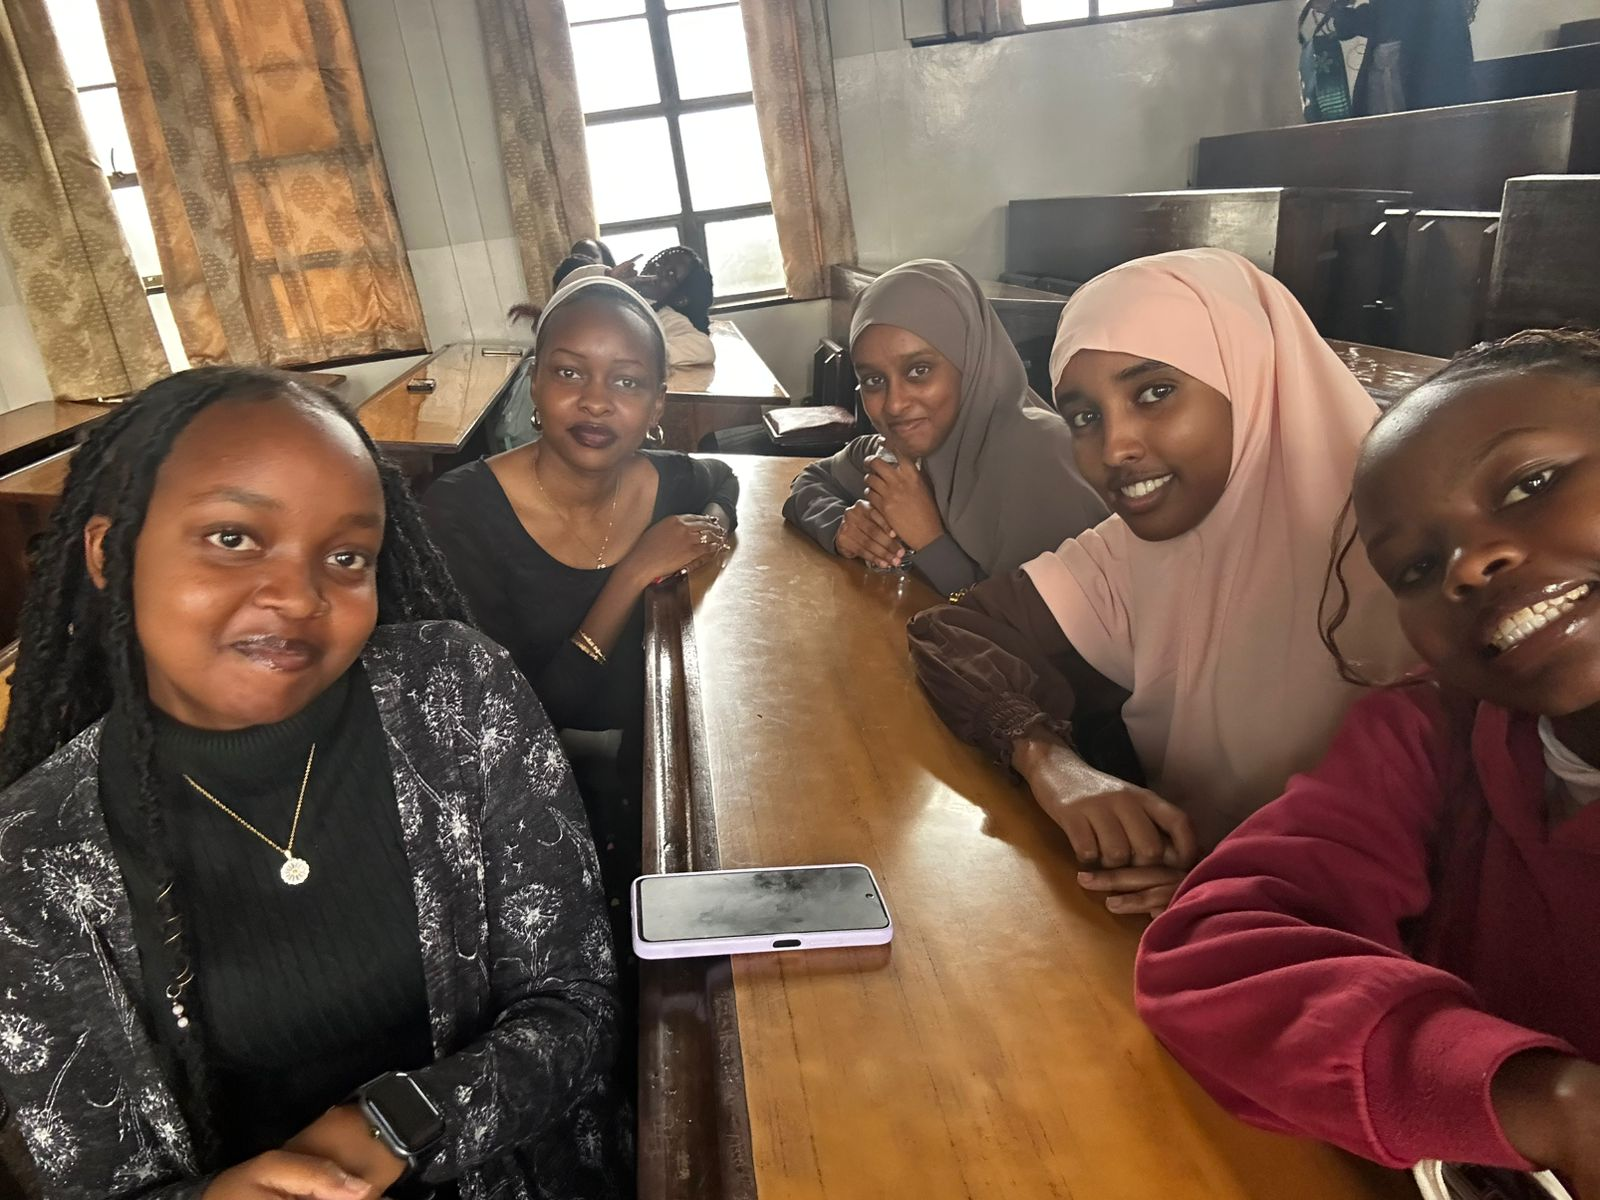